Hola **Roberto**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Hola Roberto, no encuentro los comentarios de la iteración anterior. Te pediría siempre tratar de mantenerlos para poder dar un seguimiento adecuado de tu progreso, en este caso ya que no se puede, la intervensión será breve donde sea necesaria.
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Disculpas, pense hacer uno en limpio, pero lo tendre presente

</div>

# Análisis de Métrica y Recomendaciones de Marketing 

## Descripción del proyecto
Lo has hecho de maravilla en el curso de TripleTen y te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

Cuentas con:

registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
un archivo con los pedidos en este periodo;
estadísticas de gastos de marketing.
Lo que vas a investigar: 

cómo los clientes usan el servicio;
cuándo empiezan a comprar;
cuánto dinero aporta cada cliente a la compañía;
cuándo los ingresos cubren el costo de adquisición de los clientes.



In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns



In [67]:
# Cargar los datos
visits = pd.read_csv("/datasets/visits_log_us.csv", parse_dates=["Start Ts", "End Ts"])
orders = pd.read_csv("/datasets/orders_log_us.csv", parse_dates=["Buy Ts"])
costs = pd.read_csv("/datasets/costs_us.csv", parse_dates=["dt"])

In [68]:
print(visits.dtypes)

Device               object
End Ts       datetime64[ns]
Source Id             int64
Start Ts     datetime64[ns]
Uid                  uint64
dtype: object


In [69]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [70]:
print(orders.dtypes)

Buy Ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object


In [71]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [72]:
print(costs.dtypes)

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


In [73]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [74]:
# Optimizar datos
visits["Uid"] = visits["Uid"].astype("str")
visits["Device"] = visits["Device"].astype("category")
visits["Source Id"] = visits["Source Id"].astype("category")

In [75]:
orders["Uid"] = orders["Uid"].astype("str")
orders["Revenue"] = orders["Revenue"].astype("float")

In [76]:
costs["source_id"] = costs["source_id"].astype("category")
costs["costs"] = costs["costs"].astype("float")

In [77]:
# Comprobar optimización
print(visits.dtypes)

Device             category
End Ts       datetime64[ns]
Source Id          category
Start Ts     datetime64[ns]
Uid                  object
dtype: object


In [78]:
print(orders.dtypes)

Buy Ts     datetime64[ns]
Revenue           float64
Uid                object
dtype: object


In [79]:
print(costs.dtypes)

source_id          category
dt           datetime64[ns]
costs               float64
dtype: object


###  Visitas:
¿Cuántas personas lo usan cada día, semana y mes?

In [80]:
# Convertir Start Ts a datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

# Extraer fecha, semana y mes
visits['date'] = visits['Start Ts'].dt.date
visits['week'] = visits['Start Ts'].dt.to_period('W')
visits['month'] = visits['Start Ts'].dt.to_period('M')

# Número de usuarios por día
daily_users = visits.groupby('date')['Uid'].nunique()

# Número de usuarios por semana
weekly_users = visits.groupby('week')['Uid'].nunique()

# Número de usuarios por mes
monthly_users = visits.groupby('month')['Uid'].nunique()


In [81]:
# Mostrar los primeros resultados
print("Usuarios por día:\n", daily_users.head())
 

Usuarios por día:
 date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64


In [82]:
print("Usuarios únicos por semana:\n", weekly_users.head())

Usuarios únicos por semana:
 week
2017-05-29/2017-06-04    2021
2017-06-05/2017-06-11    4129
2017-06-12/2017-06-18    2812
2017-06-19/2017-06-25    2878
2017-06-26/2017-07-02    3064
Freq: W-SUN, Name: Uid, dtype: int64


In [83]:
print("Usuarios únicos por mes:\n", monthly_users.head())

Usuarios únicos por mes:
 month
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Freq: M, Name: Uid, dtype: int64


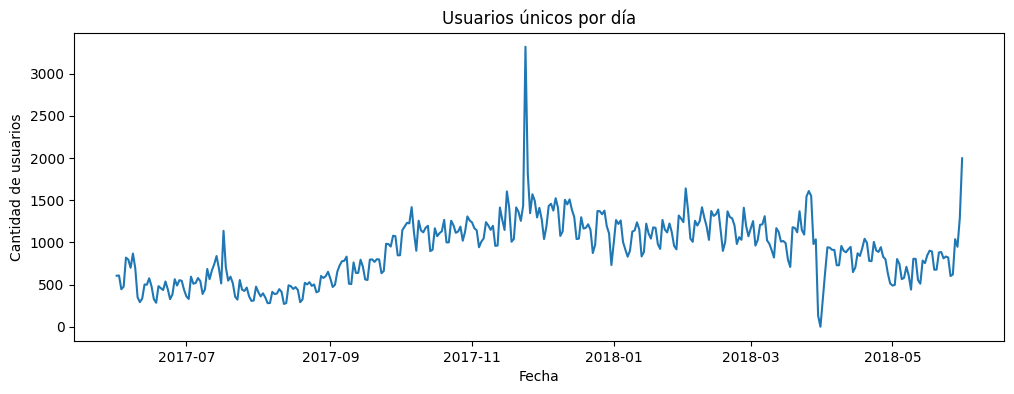

In [84]:
plt.figure(figsize=(12, 4))
daily_users.plot(title="Usuarios únicos por día", xlabel="Fecha", ylabel="Cantidad de usuarios")
plt.show()

Se puede  analizar la cantidad de usuarios que visitan la plataforma en diferentes períodos, siendo los meses de nov y dic donde mas se visitan  

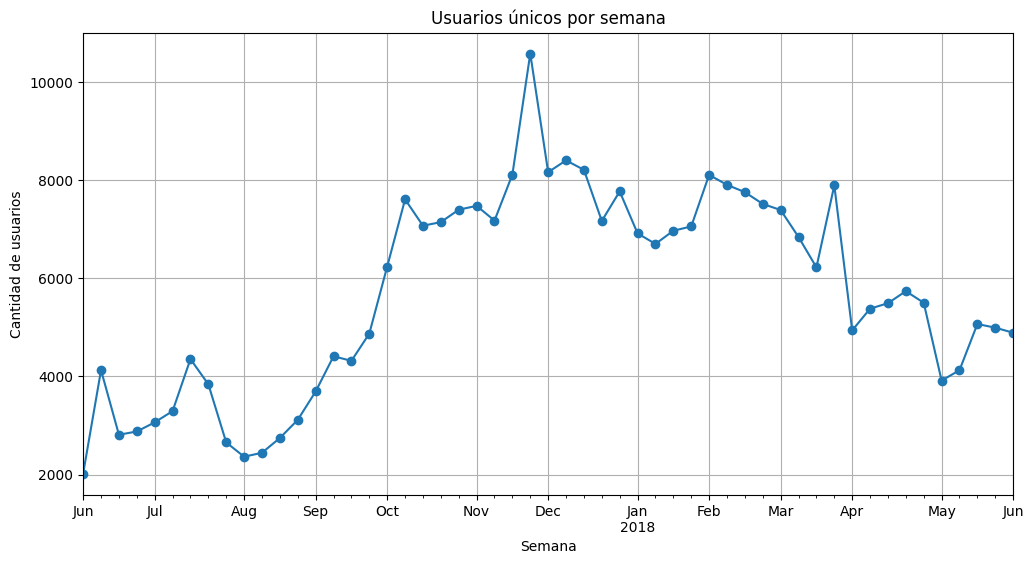

In [85]:
# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
weekly_users.plot(kind='line', marker='o', title="Usuarios únicos por semana", xlabel="Semana", ylabel="Cantidad de usuarios", grid=True)

# Mostrar el gráfico
plt.show()

Este gráfico se puede  visualizar la evolución del número de usuarios semana a semana, lo que puede revelar patrones estacionales o tendencias de crecimiento.

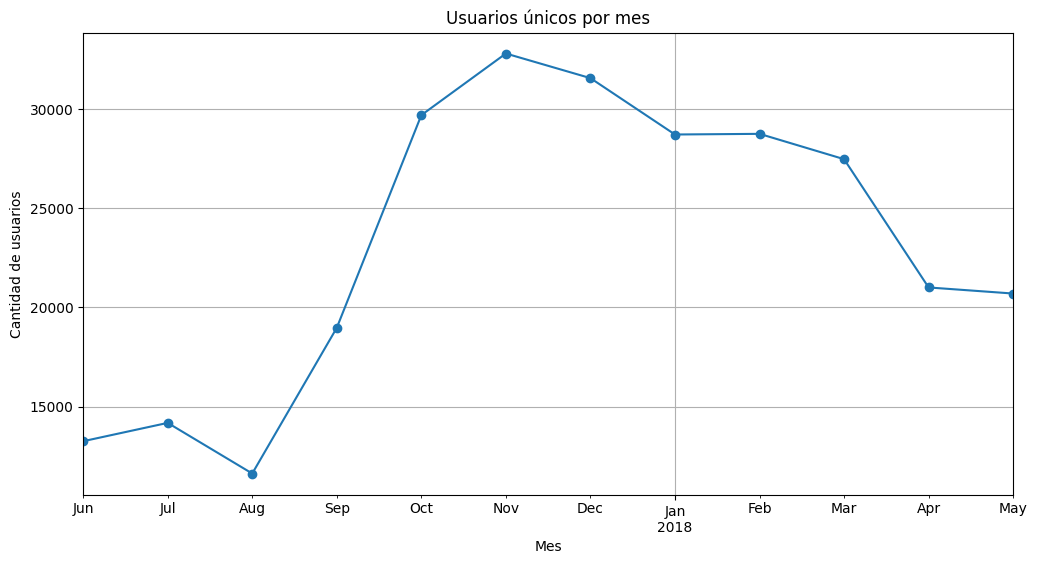

In [86]:
# Crear el gráfico de línea de usuarios por mes
plt.figure(figsize=(12, 6))
monthly_users.plot(kind='line', marker='o', title="Usuarios únicos por mes", xlabel="Mes", ylabel="Cantidad de usuarios", grid=True)

# Mostrar el gráfico
plt.show()

Se visualiza tendencias a largo plazo, como aumentos o disminuciones en la cantidad de usuarios a lo largo de los meses. También puedes identificar patrones estacionales o efectos de campañas de marketing.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, esta es la mejor forma de presentar este tipo de resultados
</div>

¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [87]:
# Contar sesiones por día
daily_sessions = visits.groupby(visits["Start Ts"].dt.date)["Uid"].count()

# Mostrar los primeros resultados
print("Sesiones por día:\n", daily_sessions.head())

Sesiones por día:
 Start Ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: Uid, dtype: int64


In [88]:
# Calcular la duración de cada sesión
visits["session_duration"] = (visits["End Ts"] - visits["Start Ts"]).dt.total_seconds()/60
visits["session_duration"].head()
# Mostrar algunos resultados
#print("Duración de las sesiones:\n", visits[["Start Ts", "End Ts", "session_duration"]].head())

0    18.0
1    28.0
2     0.0
3    24.0
4     0.0
Name: session_duration, dtype: float64

¿Con qué frecuencia los usuarios regresan?

In [89]:
# Ordenar por usuario y fecha de inicio de sesión
visits_sorted = visits.sort_values(by=["Uid", "Start Ts"])

# Calcular el tiempo entre visitas por usuario
visits_sorted["previous_visit"] = visits_sorted.groupby("Uid")["Start Ts"].shift(1)
visits_sorted["time_since_last_visit"] = (visits_sorted["Start Ts"] - visits_sorted["previous_visit"]).dt.days

# Mostrar algunos resultados
print("Tiempo entre visitas:\n", visits_sorted[["Uid", "Start Ts", "previous_visit", "time_since_last_visit"]].head())

# Calcular la cantidad de usuarios que regresan en diferentes períodos
daily_returning_users = visits_sorted[visits_sorted["time_since_last_visit"] == 1]["Uid"].nunique()
weekly_returning_users = visits_sorted[visits_sorted["time_since_last_visit"] <= 7]["Uid"].nunique()
monthly_returning_users = visits_sorted[visits_sorted["time_since_last_visit"] <= 30]["Uid"].nunique()

print(f"Usuarios que regresan diariamente: {daily_returning_users}")
print(f"Usuarios que regresan semanalmente: {weekly_returning_users}")
print(f"Usuarios que regresan mensualmente: {monthly_returning_users}")

Tiempo entre visitas:
                          Uid            Start Ts previous_visit  \
161613  10000171586432207426 2017-12-01 15:11:00            NaT   
213852  10000344846682484395 2018-02-21 16:01:00            NaT   
86970    1000036778515242839 2017-09-05 20:22:00            NaT   
175418  10000460875579931334 2017-09-13 09:12:00            NaT   
198336  10000558740593440652 2018-01-03 18:39:00            NaT   

        time_since_last_visit  
161613                    NaN  
213852                    NaN  
86970                     NaN  
175418                    NaN  
198336                    NaN  
Usuarios que regresan diariamente: 6055
Usuarios que regresan semanalmente: 29955
Usuarios que regresan mensualmente: 38465


grafico de la distribucion de la duracion de la sesiones

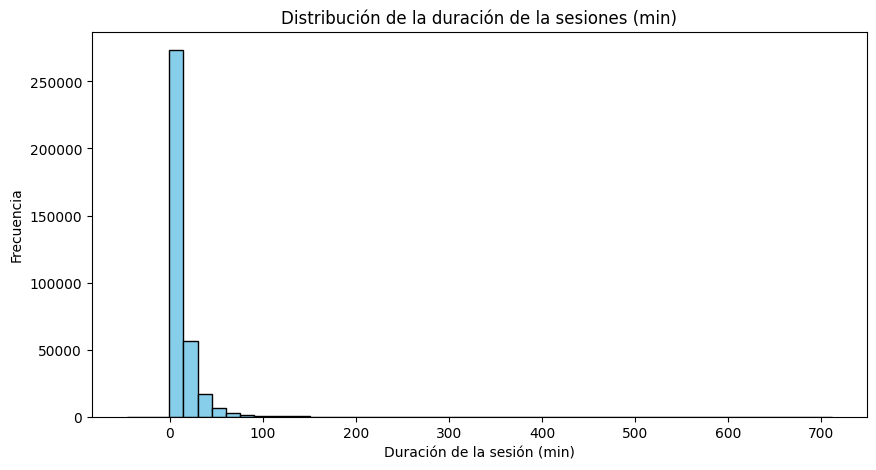

In [90]:
plt.figure(figsize=(10, 5))
plt.hist(visits["session_duration"], bins=50, color= "skyblue", edgecolor= "black")

# Etiquetas y título
plt.title("Distribución de la duración de la sesiones (min)")
plt.xlabel("Duración de la sesión (min)")
plt.ylabel("Frecuencia")


# Mostrar gráfico
plt.show()

Si el histograma tiene una cola larga a la derecha, significa que la mayoría de los usuarios tienen sesiones cortas, pero unos pocos pasan mucho tiempo en el sitio.
Por ejemplo, si el mayor número de sesiones ocurre en menos de 5 minutos, los usuarios pueden estar navegando rápidamente sin profundizar mucho.

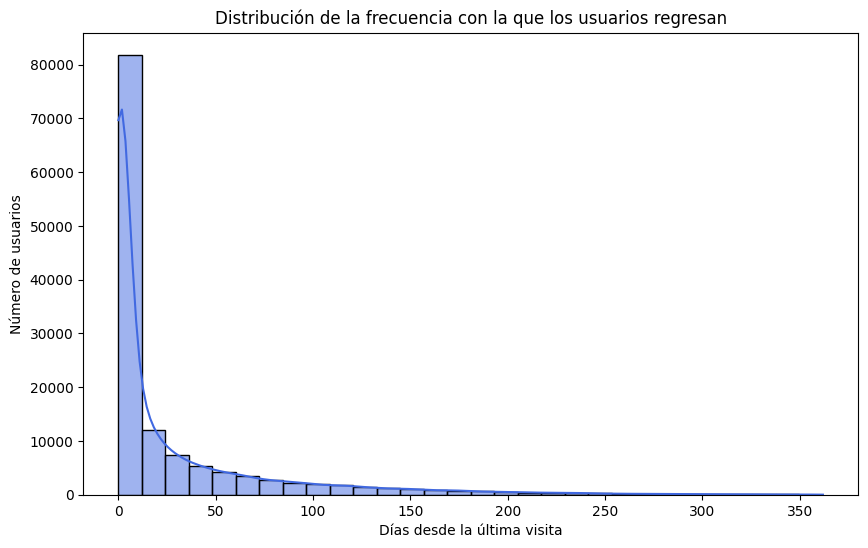

In [91]:

# Ordenar por usuario y fecha de inicio de sesión
visits_sorted = visits.sort_values(by=["Uid", "Start Ts"])

# Calcular el tiempo entre visitas por usuario
visits_sorted["previous_visit"] = visits_sorted.groupby("Uid")["Start Ts"].shift(1)
visits_sorted["time_since_last_visit"] = (visits_sorted["Start Ts"] - visits_sorted["previous_visit"]).dt.days

# Filtrar valores válidos y eliminar sesiones iniciales (donde no hay visita previa)
valid_returns = visits_sorted["time_since_last_visit"].dropna()

# Crear el gráfico de distribución
plt.figure(figsize=(10, 6))
sns.histplot(valid_returns, bins=30, kde=True, color="royalblue")

# Etiquetas y título
plt.xlabel("Días desde la última visita")
plt.ylabel("Número de usuarios")
plt.title("Distribución de la frecuencia con la que los usuarios regresan")

# Mostrar gráfico
plt.show()

Distribución de los días entre visitas

Si hay un pico alto en los primeros días, significa que muchos usuarios regresan rápidamente después de su primera visita.

Si la distribución es más uniforme y extendida, podría indicar que los usuarios regresan con menos frecuencia o de manera impredecible.

Si hay una cola larga a la derecha, significa que algunos usuarios tardan muchos días en regresar.

Esto podría indicar clientes eventuales en lugar de visitantes recurrentes.

# Ventas: 

¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

In [92]:
# Unir las visitas y los pedidos por usuario
conversion_data = visits.merge(orders, on="Uid", how="inner")

# Calcular la diferencia en días entre la primera visita y la primera compra
conversion_data["conversion_time"] = (conversion_data["Buy Ts"] - conversion_data["Start Ts"]).dt.days

# Definir categorías de conversión
conversion_data["conversion_category"] = pd.cut(
    conversion_data["conversion_time"],
    bins=[-1, 0, 1, 3, 7, 14, 30, 60, 90],  # Rango de días para clasificación
    labels=["Conversion 0d", "Conversion 1d", "Conversion 2-3d", "Conversion 4-7d",
            "Conversion 8-14d", "Conversion 15-30d", "Conversion 31-60d", "Conversion 61-90d"]
)

# Contar la cantidad de usuarios por categoría de conversión
conversion_counts = conversion_data["conversion_category"].value_counts().sort_index()

# Mostrar resultados
print("Distribución de conversiones:\n", conversion_counts)

Distribución de conversiones:
 Conversion 0d        53424
Conversion 1d         6922
Conversion 2-3d      10789
Conversion 4-7d      18022
Conversion 8-14d     24981
Conversion 15-30d    45311
Conversion 31-60d    62413
Conversion 61-90d    48131
Name: conversion_category, dtype: int64


In [93]:
conversion_data.head()

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month,session_duration,Buy Ts,Revenue,conversion_time,conversion_category
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,24.0,2018-03-09 20:25:00,2.33,-72,NaN
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-05/2018-03-11,2018-03,28.0,2018-03-09 20:25:00,2.33,0,Conversion 0d
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-28/2017-09-03,2017-09,1.0,2017-09-04 12:46:00,2.44,0,Conversion 0d
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-28/2017-09-03,2017-09,1.0,2017-10-28 00:01:00,1.53,54,Conversion 31-60d
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-28/2017-09-03,2017-09,1.0,2017-10-28 19:16:00,1.53,54,Conversion 31-60d


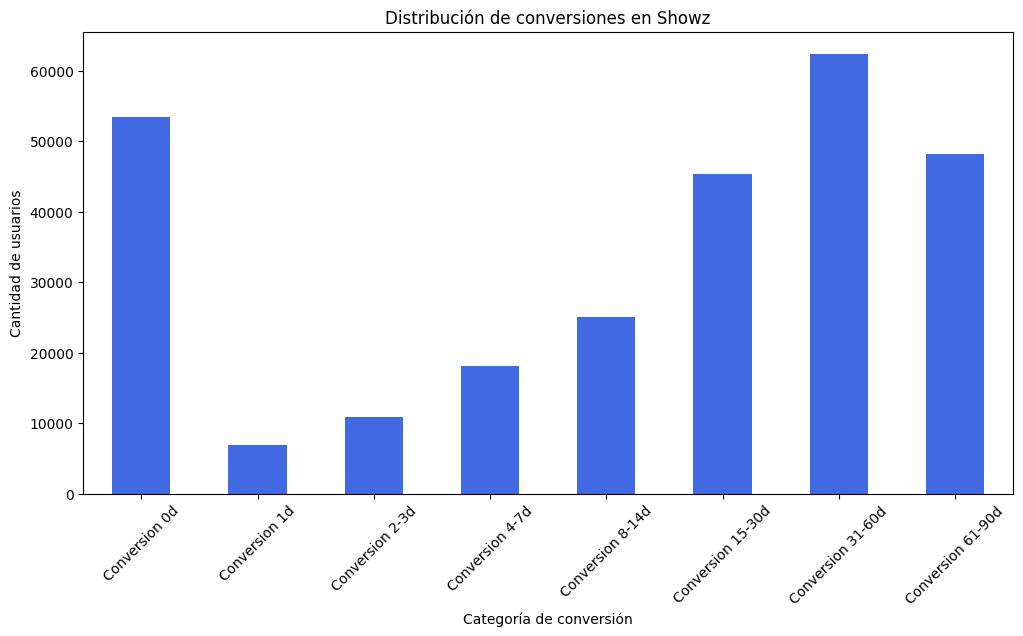

In [94]:
import matplotlib.pyplot as plt

# Crear el gráfico de distribución de conversiones
plt.figure(figsize=(12, 6))
conversion_counts.sort_index().plot(kind="bar", color="royalblue")

# Etiquetas y título
plt.xlabel("Categoría de conversión")
plt.ylabel("Cantidad de usuarios")
plt.title("Distribución de conversiones en Showz")

# Rotar etiquetas para mejor visualización
plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()

Si hay un pico alto en Conversion 0d, significa que muchos usuarios compran el mismo día en que visitan Showz por primera vez.

Si las conversiones tardías (30+ días) son frecuentes, podríamos explorar estrategias para acelerar la conversión, como email marketing o retargeting.

Comparar esto con los canales de adquisición (Source Id) podría ayudar a identificar qué canales generan conversiones más rápidas.

¿Cuántos pedidos hacen durante un período de tiempo dado?

In [95]:
# Contar pedidos por día
daily_orders = orders.groupby(orders["Buy Ts"].dt.date)["Uid"].count()

# Contar pedidos por semana
weekly_orders = orders.groupby(orders["Buy Ts"].dt.to_period("W"))["Uid"].count()

# Contar pedidos por mes
monthly_orders = orders.groupby(orders["Buy Ts"].dt.to_period("M"))["Uid"].count()

# Mostrar algunos resultados
print("Pedidos por día:\n", daily_orders.head())


Pedidos por día:
 Buy Ts
2017-06-01     96
2017-06-02    111
2017-06-03     67
2017-06-04     66
2017-06-05    161
Name: Uid, dtype: int64


In [96]:
print("Pedidos por semana:\n", weekly_orders.head())


Pedidos por semana:
 Buy Ts
2017-05-29/2017-06-04    340
2017-06-05/2017-06-11    938
2017-06-12/2017-06-18    343
2017-06-19/2017-06-25    371
2017-06-26/2017-07-02    460
Freq: W-SUN, Name: Uid, dtype: int64


In [97]:
print("Pedidos por mes:\n", monthly_orders.head())

Pedidos por mes:
 Buy Ts
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
Freq: M, Name: Uid, dtype: int64


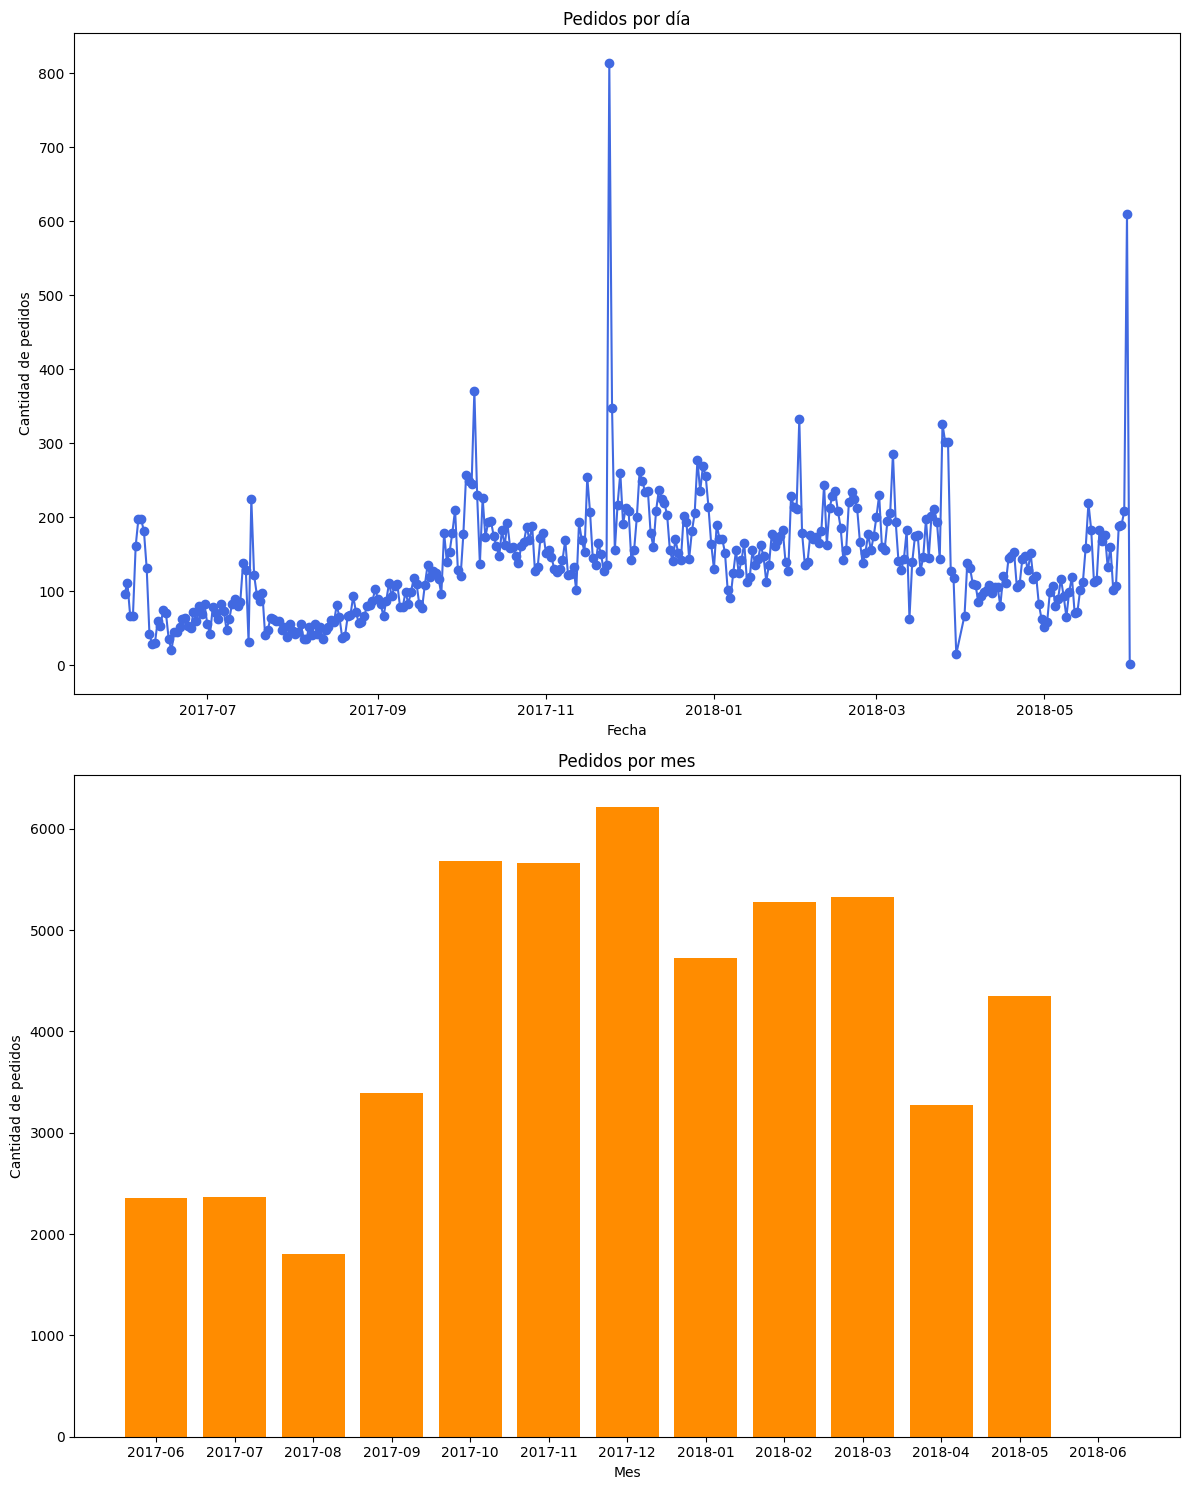

In [98]:
# Crear figuras y gráficos
fig, axes = plt.subplots(2, 1, figsize=(12, 15))

# Gráfico de pedidos por día
axes[0].plot(daily_orders.index, daily_orders.values, marker='o', linestyle='-', color="royalblue")
axes[0].set_title("Pedidos por día")
axes[0].set_xlabel("Fecha")
axes[0].set_ylabel("Cantidad de pedidos")

# Gráfico de pedidos por semana
#axes[1].bar(weekly_orders.index.astype(str), weekly_orders.values, color="mediumseagreen")
#axes[1].set_title("Pedidos por semana")
#axes[1].set_xlabel("Semana")
#axes[1].set_ylabel("Cantidad de pedidos")
# Crear el gráfico de pedidos por semana


# Gráfico de pedidos por mes
axes[1].bar(monthly_orders.index.astype(str), monthly_orders.values, color="darkorange")
axes[1].set_title("Pedidos por mes")
axes[1].set_xlabel("Mes")
axes[1].set_ylabel("Cantidad de pedidos")

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()

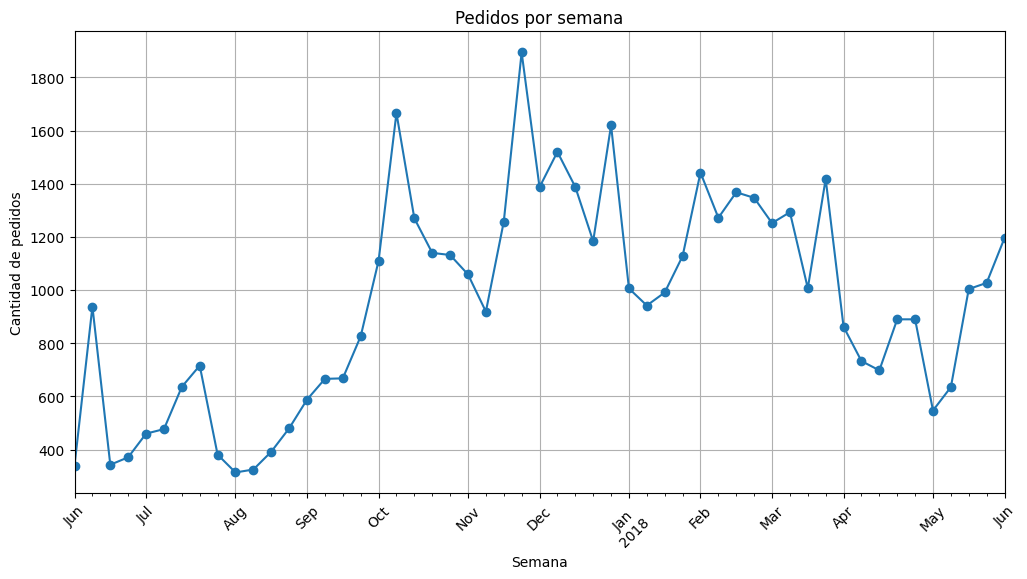

In [99]:
plt.figure(figsize=(12, 6))
weekly_orders.plot(kind='line', marker='o', title="Pedidos por semana", xlabel="Semana", ylabel="Cantidad de pedidos", grid=True)

# Ajustar los ticks del eje X
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Fluctuaciones diarias

¿Vemos picos en ciertos días? Si es así, podríamos investigar si coinciden con eventos específicos, promociones o hábitos de compra de los usuarios.

Si hay días con muy pocos pedidos, podríamos analizar posibles razones como baja actividad publicitaria o falta de eventos atractivos.

Patrones semanales

Si los pedidos tienen un comportamiento cíclico (por ejemplo, aumento los fines de semana y disminución entre semana), podríamos ajustar estrategias de marketing en función de estos patrones.

Si hay semanas con muchos más pedidos que otras, podríamos revisar si hubo campañas específicas o eventos especiales.

Tendencias mensuales

¿Existe un crecimiento constante en el número de pedidos, o hay temporadas donde las ventas bajan? Esto podría estar relacionado con estacionalidad de eventos o tendencias de mercado.

Si hay un pico en ciertos meses, podríamos explorar si se debe a festivales, conciertos grandes o tendencias en la industria del entretenimiento.

¿Cuál es el tamaño promedio de compra?

In [100]:
# Calcular el tamaño promedio de compra
average_order_size = orders["Revenue"].mean()

print(f"Tamaño promedio de compra: ${average_order_size:.2f}")

Tamaño promedio de compra: $5.00


¿Cuánto dinero traen? (LTV)

In [101]:
 # Crear cohortes basadas en el primer registro de compra
conversion_data['cohort'] = conversion_data['Buy Ts'].dt.to_period('M')  # Definir cohortes por mes

# Agrupar por cohorte para calcular ingresos totales y cantidad de usuarios únicos
ltv_data = conversion_data.groupby('cohort').agg({
    'Revenue': 'sum',  # Total de ingresos por cohorte
    'Uid': 'nunique'   # Número de usuarios únicos en la cohorte
}).reset_index()

# Calcular el LTV
ltv_data['LTV'] = ltv_data['Revenue'] / ltv_data['Uid']

print(ltv_data)

     cohort     Revenue   Uid         LTV
0   2017-06   148121.29  2023   73.218631
1   2017-07   253987.24  1984  128.017762
2   2017-08   211562.04  1472  143.724212
3   2017-09   738489.76  2750  268.541731
4   2017-10   687489.99  4675  147.056682
5   2017-11   497997.76  4547  109.522270
6   2017-12  1445074.82  4942  292.406884
7   2018-01   504331.57  3898  129.382137
8   2018-02   667585.76  4258  156.783880
9   2018-03   815240.79  4181  194.987034
10  2018-04   586046.86  2744  213.573929
11  2018-05   406276.05  3544  114.637712
12  2018-06        3.42     1    3.420000


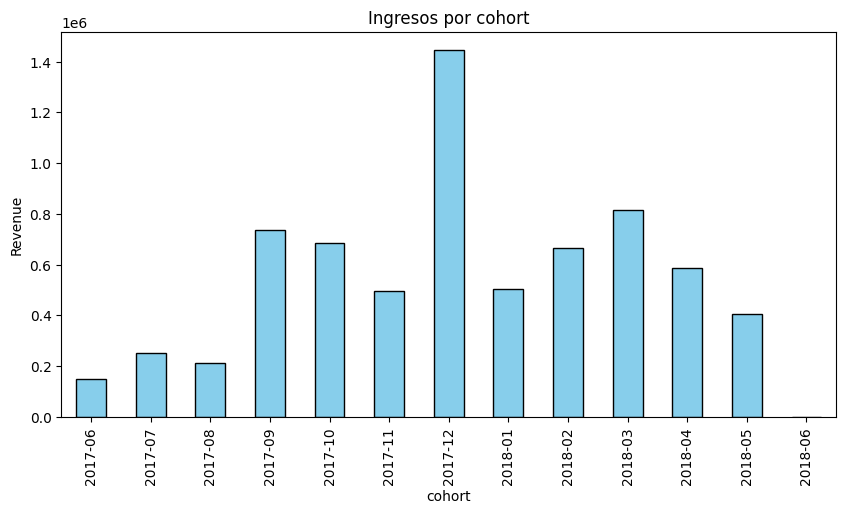

In [102]:
# Agrupar los datos por Source Id y sumar los ingresos
revenue_per_source = ltv_data.groupby('cohort')['Revenue'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
revenue_per_source.plot(kind='bar', color='skyblue', edgecolor='black')

# Configurar etiquetas y título
plt.xlabel("cohort")
plt.ylabel("Revenue")
plt.title("Ingresos por cohort")

# Mostrar el gráfico
plt.show()

Ayuda a identificar qué cohort  generan más ingresos y podría ser útil para estrategias de fidelización. 
Cohortes con alto LTV: Indican que los clientes adquiridos en esos períodos han generado mayor ingreso a lo largo del tiempo.
Tendencia a lo largo del tiempo: Si el LTV disminuye en cohortes recientes, podría ser una señal de que la efectividad del marketing ha bajado.

Puntos de inflexión: Si hay un aumento repentino en el LTV de ciertas cohortes, podríamos analizar qué campañas fueron efectivas en esos períodos.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Al hacerlod e manera tan granular y presentar solo una muestra puede sesgar el análisis, deberías hacerlo de manera más general cómo por cohort and lugar de usuario.
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Corregi el grafico y lo hice con la columna cohort donde vemos cuales tuvieron mas ingresos 
</div>

¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [103]:
# Gasto total en marketing
total_cost = costs["costs"].sum()

# Calcular el gasto por fuente de adquisición
cost_by_source = costs.groupby("source_id")["costs"].sum()

# Calcular el gasto por día, semana y mes
daily_cost = costs.groupby(costs["dt"])["costs"].sum()
weekly_cost = costs.groupby(costs["dt"].dt.to_period("W"))["costs"].sum()
monthly_cost = costs.groupby(costs["dt"].dt.to_period("M"))["costs"].sum()

# Mostrar resultados
print(f"Gasto total de marketing: ${total_cost:.2f}")
print("\nGasto por fuente de adquisición:\n", cost_by_source)


Gasto total de marketing: $329131.62

Gasto por fuente de adquisición:
 source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


In [104]:
cost_by_source.head()

source_id
1     20833.27
2     42806.04
3    141321.63
4     61073.60
5     51757.10
Name: costs, dtype: float64

In [105]:
print("\nGasto diario:\n", daily_cost.head())



Gasto diario:
 dt
2017-06-01    735.26
2017-06-02    721.19
2017-06-03    450.85
2017-06-04    761.16
2017-06-05    821.44
Name: costs, dtype: float64


In [106]:
print("\nGasto semanal:\n", weekly_cost.head())



Gasto semanal:
 dt
2017-05-29/2017-06-04    2668.46
2017-06-05/2017-06-11    5372.71
2017-06-12/2017-06-18    3462.49
2017-06-19/2017-06-25    3821.75
2017-06-26/2017-07-02    3562.67
Freq: W-SUN, Name: costs, dtype: float64


In [107]:
print("\nGasto mensual:\n", monthly_cost.head())


Gasto mensual:
 dt
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
Freq: M, Name: costs, dtype: float64


/tmp/ipykernel_32/2230304926.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(weekly_cost.index.astype(str), rotation=45)


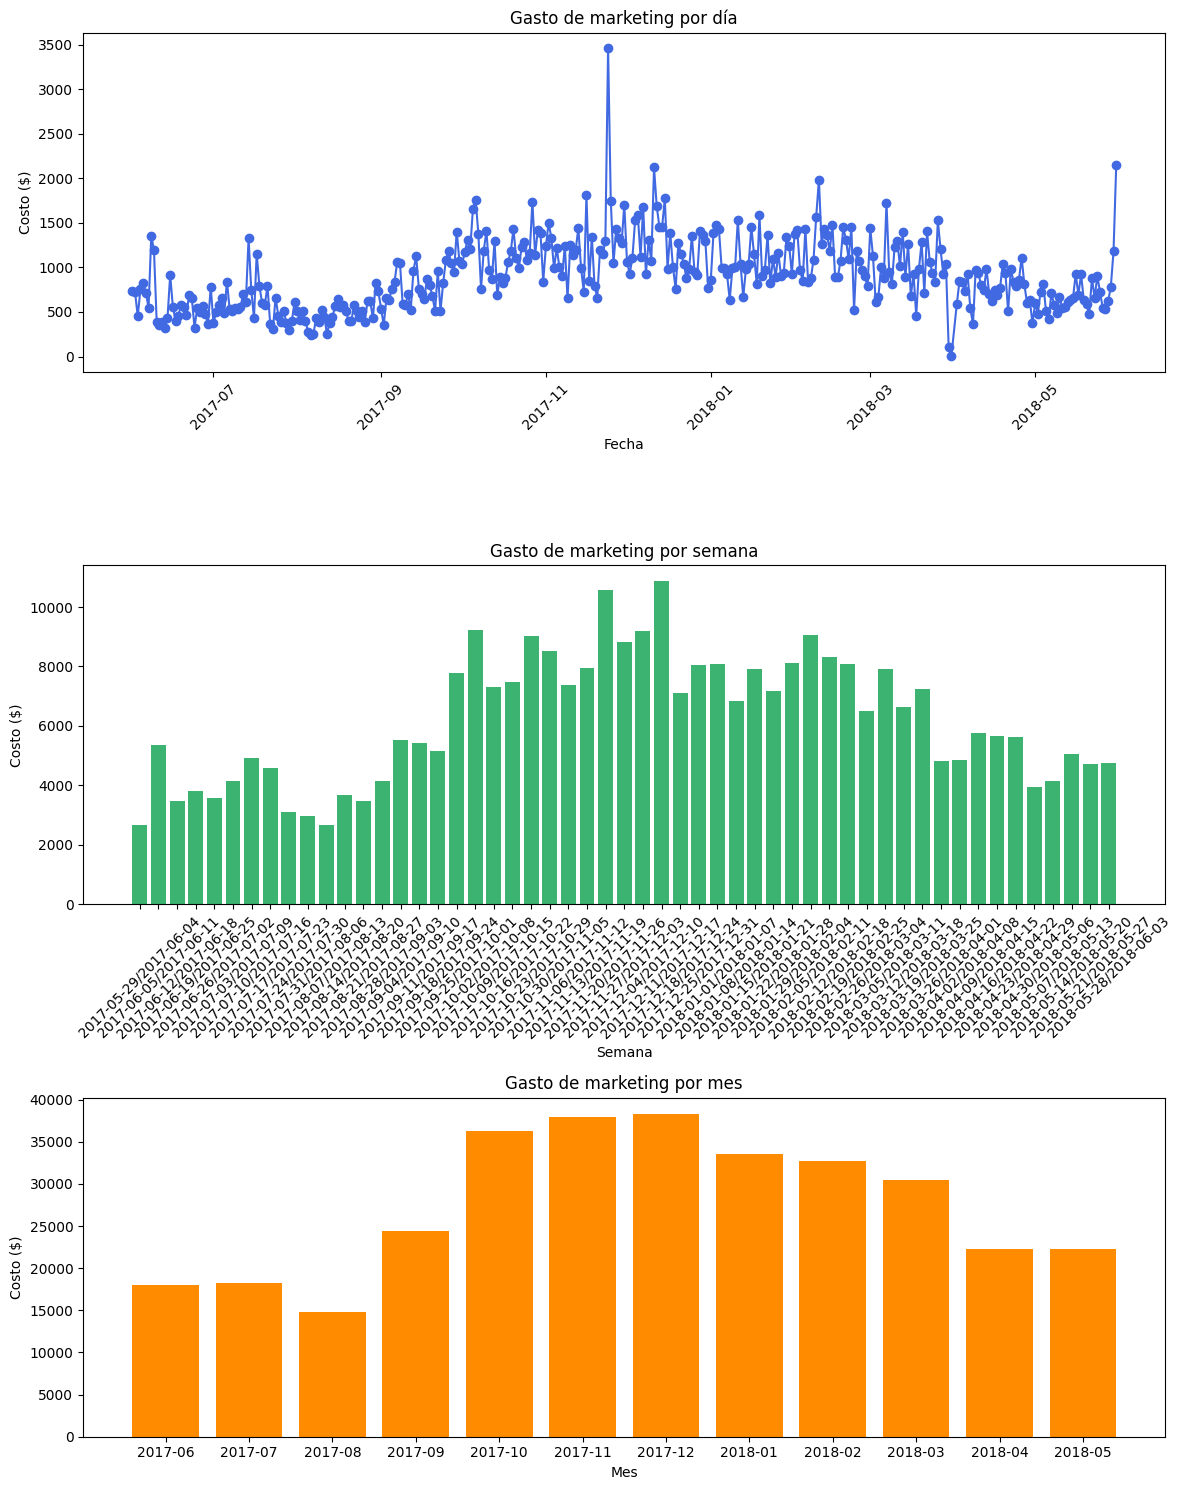

In [108]:
# Crear figura y gráficos
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Gráfico de gasto diario
axes[0].plot(daily_cost.index, daily_cost.values, marker='o', linestyle='-', color="royalblue")
axes[0].set_title("Gasto de marketing por día")
axes[0].set_xlabel("Fecha")
axes[0].set_ylabel("Costo ($)")
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de gasto semanal
axes[1].bar(weekly_cost.index.astype(str), weekly_cost.values, color="mediumseagreen")
axes[1].set_title("Gasto de marketing por semana")
axes[1].set_xlabel("Semana")
axes[1].set_ylabel("Costo ($)")
axes[1].set_xticklabels(weekly_cost.index.astype(str), rotation=45)

# Gráfico de gasto mensual
axes[2].bar(monthly_cost.index.astype(str), monthly_cost.values, color="darkorange")
axes[2].set_title("Gasto de marketing por mes")
axes[2].set_xlabel("Mes")
axes[2].set_ylabel("Costo ($)")

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()

Fluctuaciones en el gasto diario

¿Vemos picos de inversión en ciertos días? Si sí, podríamos investigar si coinciden con eventos especiales o campañas publicitarias.

Si hay días con bajos gastos, puede ser porque la empresa ajusta su presupuesto en función de demanda o rendimiento.

Patrones semanales

¿La inversión sigue un ritmo constante semana a semana o hay variaciones significativas?

Si notamos que los gastos aumentan en ciertas semanas, puede indicar estrategias de publicidad más agresivas en esos períodos.

Tendencias mensuales

¿El gasto de marketing está aumentando, disminuyendo o tiene picos estacionales?

Si observamos un aumento constante, podría indicar un crecimiento en estrategias de adquisición de clientes.

In [109]:
# la fuente de adquisición de cada usuario es la de su primer registro 
user_source = visits.sort_values(by="Start Ts").groupby("Uid").first().reset_index()[["Uid","Source Id"]] 
user_source.head()

,Uid,Source Id
0,10000171586432207426,3
1,10000344846682484395,3
2,1000036778515242839,3
3,10000460875579931334,4
4,10000558740593440652,4


In [110]:
# Extraer la primera visita (registro) de cada usuario
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index().rename(columns={'Start Ts': 'first_visit'})
first_visit.head()

,Uid,first_visit
0,10000171586432207426,2017-12-01 15:11:00
1,10000344846682484395,2018-02-21 16:01:00
2,1000036778515242839,2017-09-05 20:22:00
3,10000460875579931334,2017-09-13 09:12:00
4,10000558740593440652,2018-01-03 18:39:00


In [111]:
# Extraer el primer pedido de cada usuario
first_order = orders.groupby('Uid')['Buy Ts'].min().reset_index().rename(columns={'Buy Ts': 'first_order'})
first_order.head()

,Uid,first_order
0,10000837700716403746,2017-06-21 16:12:00
1,10000997030965831953,2018-01-19 12:28:00
2,10001199569370567060,2017-11-25 17:29:00
3,10002243978166172255,2017-10-15 17:20:00
4,10003351403065971701,2017-11-20 13:18:00


In [112]:
# Unir ambas tablas para calcular el tiempo hasta conversión
conversion = pd.merge(first_visit, first_order, on='Uid', how='inner')
conversion.head()

,Uid,first_visit,first_order
0,10000837700716403746,2017-06-08 10:12:00,2017-06-21 16:12:00
1,10000997030965831953,2018-01-19 11:16:00,2018-01-19 12:28:00
2,10001199569370567060,2017-11-25 17:26:00,2017-11-25 17:29:00
3,10002243978166172255,2017-10-15 17:18:00,2017-10-15 17:20:00
4,10003351403065971701,2017-11-20 13:17:00,2017-11-20 13:18:00


In [113]:
conversion['conversion_days'] = (conversion['first_order'] - conversion['first_visit']).dt.days
conversion.head()

,Uid,first_visit,first_order,conversion_days
0,10000837700716403746,2017-06-08 10:12:00,2017-06-21 16:12:00,13
1,10000997030965831953,2018-01-19 11:16:00,2018-01-19 12:28:00,0
2,10001199569370567060,2017-11-25 17:26:00,2017-11-25 17:29:00,0
3,10002243978166172255,2017-10-15 17:18:00,2017-10-15 17:20:00,0
4,10003351403065971701,2017-11-20 13:17:00,2017-11-20 13:18:00,0


In [114]:
print("Tiempo hasta la conversión (días) para algunos usuarios:")
display(conversion[['Uid', 'first_visit', 'first_order', 'conversion_days']].head(10))

Tiempo hasta la conversión (días) para algunos usuarios:


,Uid,first_visit,first_order,conversion_days
0,10000837700716403746,2017-06-08 10:12:00,2017-06-21 16:12:00,13
1,10000997030965831953,2018-01-19 11:16:00,2018-01-19 12:28:00,0
2,10001199569370567060,2017-11-25 17:26:00,2017-11-25 17:29:00,0
3,10002243978166172255,2017-10-15 17:18:00,2017-10-15 17:20:00,0
4,10003351403065971701,2017-11-20 13:17:00,2017-11-20 13:18:00,0
5,10003425910527970929,2018-03-25 19:01:00,2018-03-25 19:26:00,0
6,10003843789561818935,2017-09-25 23:05:00,2017-12-12 20:54:00,77
7,10003858247064282365,2017-08-22 23:05:00,2017-10-31 21:54:00,69
8,10003922165532733227,2017-11-16 09:42:00,2017-11-16 09:43:00,0
9,10004355444061692288,2017-12-03 12:43:00,2017-12-03 12:44:00,0


In [115]:
# Suponemos que la fuente de adquisición de cada usuario es la de su primer registro
user_source = visits.sort_values(by='Start Ts').groupby('Uid').first().reset_index()[['Uid', 'Source Id']]
user_source.head()

,Uid,Source Id
0,10000171586432207426,3
1,10000344846682484395,3
2,1000036778515242839,3
3,10000460875579931334,4
4,10000558740593440652,4


In [116]:
# Unir la información de conversión con la fuente
conversion_whith_source= pd.merge(conversion,user_source, on ="Uid", how= "left")
conversion_whith_source.head()

,Uid,first_visit,first_order,conversion_days,Source Id
0,10000837700716403746,2017-06-08 10:12:00,2017-06-21 16:12:00,13,4
1,10000997030965831953,2018-01-19 11:16:00,2018-01-19 12:28:00,0,4
2,10001199569370567060,2017-11-25 17:26:00,2017-11-25 17:29:00,0,4
3,10002243978166172255,2017-10-15 17:18:00,2017-10-15 17:20:00,0,4
4,10003351403065971701,2017-11-20 13:17:00,2017-11-20 13:18:00,0,4


In [117]:
cost_by_source.head()

source_id
1     20833.27
2     42806.04
3    141321.63
4     61073.60
5     51757.10
Name: costs, dtype: float64

In [118]:
# Número de clientes adquiridos por fuente
customers_by_source = conversion_whith_source.groupby('Source Id')['Uid'].nunique()
print("Clientes adquiridos por fuente:")
display(customers_by_source)

Clientes adquiridos por fuente:


Source Id
1      2899
2      3506
3     10473
4     10296
5      6931
6         0
7         1
9      1088
10     1329
Name: Uid, dtype: int64

In [119]:
### Cálculo del Costo de Adquisición de Clientes (CAC)
# Calcular el CAC: gasto de la fuente / número de clientes adquiridos
cac = cost_by_source / customers_by_source
print("Costo de Adquisición de Clientes (CAC) por fuente:")
display(cac)

Costo de Adquisición de Clientes (CAC) por fuente:


1      7.186364
2     12.209367
3     13.493901
4      5.931779
5      7.467479
6           NaN
7           NaN
9      5.071222
10     4.381106
dtype: float64

In [120]:
## Cálculo del ROMI (Return on Marketing Investment)
# Asociar órdenes con la fuente de adquisición (utilizando la fuente del primer registro)
orders_with_source = pd.merge(orders, user_source, on='Uid', how='left')
orders_with_source.head()

,Buy Ts,Revenue,Uid,Source Id
0,2017-06-01 00:10:00,17.00,10329302124590727494,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,3


In [121]:
# Ingresos por fuente
revenue_by_source = orders_with_source.groupby('Source Id')['Revenue'].sum()
revenue_by_source.head()

Source Id
1    31090.55
2    46923.61
3    54511.24
4    56696.83
5    52624.02
Name: Revenue, dtype: float64

In [122]:
# Calcular ROMI: (ingresos - gasto) / gasto
romi = (revenue_by_source - cost_by_source) / cost_by_source
print("ROMI por fuente de adquisición:")
display(romi)

ROMI por fuente de adquisición:


1     0.492351
2     0.096191
3    -0.614275
4    -0.071664
5     0.016750
6          NaN
7          NaN
9     0.043844
10   -0.235665
dtype: float64

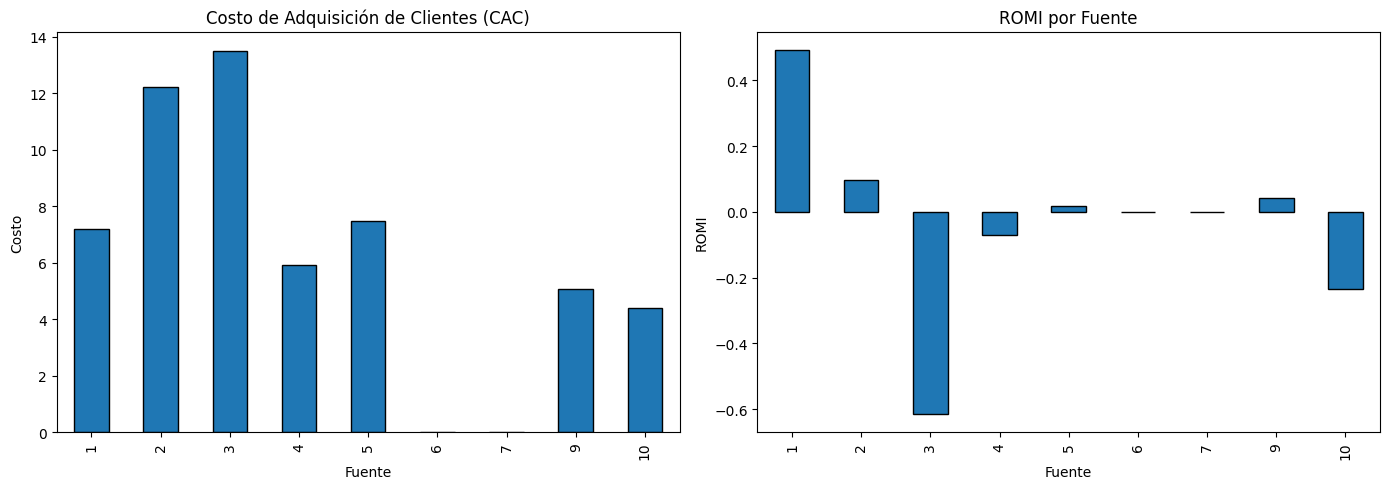

In [123]:
# Graficar CAC y ROMI
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

cac.plot(kind='bar', ax=ax[0], edgecolor='black')
ax[0].set_title('Costo de Adquisición de Clientes (CAC)')
ax[0].set_xlabel('Fuente')
ax[0].set_ylabel('Costo')

romi.plot(kind='bar', ax=ax[1], edgecolor='black')
ax[1].set_title('ROMI por Fuente')
ax[1].set_xlabel('Fuente')
ax[1].set_ylabel('ROMI')

plt.tight_layout()
plt.show()

In [124]:
# Calcular el total de ingresos por cohorte y fuente de anuncios
conversion_data['cohort'] = conversion_data['Buy Ts'].dt.to_period('M')  # Definir cohortes por mes

# Agrupar datos por cohorte y fuente
pivot_data = conversion_data.groupby(['cohort', 'Source Id']).agg({
    'Revenue': 'sum',  # Total de ingresos
    'Uid': 'nunique'   # Número de usuarios únicos
}).reset_index()

# Cargar costos de marketing (suponiendo que tienes una tabla llamada "costs")
costs['cohort'] = costs['dt'].dt.to_period('M')

# Agregar costos de marketing por cohorte y fuente
pivot_data = pivot_data.merge(costs.groupby(['cohort', 'source_id']).agg({'costs': 'sum'}).reset_index(),
                              left_on=['cohort', 'Source Id'], right_on=['cohort', 'source_id'], how='left')

# Calcular CAC y ROMI
pivot_data['CAC'] = pivot_data['costs'] / pivot_data['Uid']  # Costo de adquisición por usuario único
pivot_data['ROMI'] = (pivot_data['Revenue'] - pivot_data['costs']) / pivot_data['costs']  # Retorno sobre inversión

# Crear la tabla pivotada
pivot_table = pivot_data.pivot_table(values=['CAC', 'ROMI'], index='cohort', columns='Source Id')

print(pivot_table)

                CAC                                                     \
Source Id        1         2          3         4         5         9    
cohort                                                                   
2017-06    2.807007  5.311554   8.846281  5.457764  4.581646  1.550109   
2017-07    2.455103  4.995953  10.191726  4.584065  4.758952  1.833576   
2017-08    2.816006  5.326618  11.149800  5.765878  4.284863  1.375304   
2017-09    2.434376  4.665094   8.825111  5.213112  4.068858  1.592414   
2017-10    2.370266  4.623092   8.675436  3.426275  3.878547  1.327691   
2017-11    2.106081  4.362161   8.853531  2.661146  4.843292  1.321431   
2017-12    1.992511  4.288792   7.862104  3.390936  4.311689  1.468705   
2018-01    2.481476  4.790023   9.272874  3.397082  4.630621  1.633313   
2018-02    2.460357  4.816297   8.364821  3.141892  4.031248  1.661145   
2018-03    1.976086  4.168224   8.039859  3.374007  4.026329  0.988251   
2018-04    2.227332  4.744374   8.9049

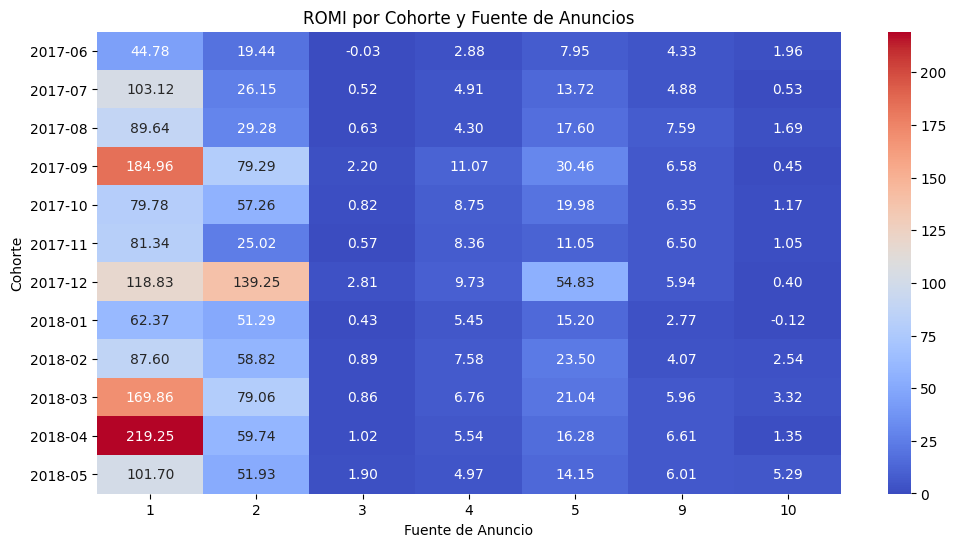

In [125]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear mapa de calor para ROMI
sns.heatmap(pivot_table['ROMI'], cmap='coolwarm', annot=True, fmt=".2f")

# Ajustar etiquetas y título
plt.title('ROMI por Cohorte y Fuente de Anuncios')
plt.xlabel('Fuente de Anuncio')
plt.ylabel('Cohorte')
plt.show()

1. Identificación de fuentes de anuncios con mayor rendimiento
Zonas con colores fríos (azules): Indican fuentes que han logrado generar un retorno positivo sobre la inversión (ROMI elevado). Estas fuentes están funcionando bien y pueden ser priorizadas en futuras campañas.

Zonas con colores cálidos (rojos): Muestran cohortes y fuentes con un ROMI bajo o negativo. Aquí hay que analizar si el costo de adquisición es demasiado alto o si los usuarios de esa fuente tienen una baja tasa de conversión.

2. Evaluación del rendimiento por cohorte
Cada cohorte representa a los usuarios que realizaron una compra en un período determinado. Observando el mapa de calor, podemos responder preguntas como:

¿Alguna cohorte ha generado consistentemente buenos resultados? Esto puede indicar una estrategia de marketing efectiva durante ese período.

¿Existen cohortes con bajo ROMI en todas las fuentes? Si es así, podría ser un efecto de factores externos como la estacionalidad o cambios en el mercado.

¿Hay alguna cohorte que haya mejorado su rendimiento en ciertas fuentes a lo largo del tiempo? Puede ser resultado de ajustes estratégicos exitosos.

3. Estrategias para optimizar inversión en marketing
Basado en el análisis del mapa de calor, podemos hacer recomendaciones como:

Redistribuir presupuesto: Invertir más en fuentes con alto ROMI y reducir gastos en fuentes con bajo rendimiento.

Reevaluar segmentación de clientes: Fuentes con bajo retorno pueden estar llegando a audiencias menos propensas a comprar.

Ajustar estrategias publicitarias: Cohortes con bajo desempeño pueden requerir cambios en mensajes de marketing o promociones.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Te recomiendo para dar más detalle al equipo de marketing, calcular los costos totales, el CAC, y el ROMI utilizando pivot_table y calculandolo para cada cohort y fuente, así se podrá identificar mejor que cohort tuve mejor resultado según la fuente. Una vez tengas la tabla resultante de pivot_table lo siguiente sería mostrar ese resultado en una gráfica tipo mapa de calor para que sea más visual el análisis
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Muchas gracias por la retroalimentación realice los costos totales de CAC y ROMI y podemos visualizar en el mapa de calor los resultados
</div>

Fuentes con bajo CAC y alto ROMI: Estas son las más eficientes en términos de adquisición y retorno de inversión. Aquí es donde se podría invertir más presupuesto.

Fuentes con alto CAC y bajo ROMI: Estas pueden ser menos rentables. Si el CAC es alto, significa que cuesta mucho adquirir clientes. Si el ROMI es bajo, el retorno de inversión no justifica el gasto.

Fuentes con alto CAC pero buen ROMI: Puede indicar que la inversión en adquisición es costosa pero está generando ingresos suficientes para justificar el gasto.

Fuentes con bajo CAC pero bajo ROMI: Indica que atraer clientes es barato, pero no están gastando mucho en la plataforma.

Conclusión y recomendaciones para la inversión en marketing
Tras analizar los datos de gasto publicitario, retorno sobre inversión (ROMI), costo de adquisición de clientes (CAC) y comportamiento de compra, es evidente que no todas las fuentes de adquisición son igual de rentables. Para optimizar la inversión, los expertos en marketing deberían seguir estas estrategias:

Invertir más en fuentes con alto ROMI

Las fuentes con ROMI superior a 1 están generando ingresos mayores al gasto. Es recomendable aumentar la inversión en estas campañas y explorar estrategias para escalar sus resultados.
Reducir gastos en fuentes con alto CAC y bajo retorno

Si una fuente tiene CAC elevado pero pocos ingresos generados, es un indicio de que atraer clientes por ese canal es costoso y poco eficiente. Se deben reconsiderar o optimizar las campañas para reducir costos y mejorar conversiones.

Tiempo hasta la conversión: Se observa que el numero de importante de usuarios realiza la primera compra en 0a 1 día, lo cual indica que ciertos canales pueden atraer usuarios altamente interesados desde el primer contacto
Costo de Adquisicion (CAC): la comparacion de CAC entre las fuentes muestra que algunas permiten adquiriri clientes a menor costo. Esto sugiere focalizar la inversion en estos canales 
Rentabilidad (ROMI): Las fuentes con altos ingresos en comparacion con el gasto son mas rentables. Las invesriines en canales con ROMI negativo deben evaluarse y optimizarce 


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cambios! Siempre este tipo de análisis que son complejos y tienen resultados complejos debes procurar dejarlos en algo más sencillo de entender cómo las gráficas, así cuando presentes los resultados a una audiencia no tan técnica lo podrán entender sin problema alguno. Saludos!
</div>